#**Health Insurance Cross Sell Prediction**








In [ ]:
import pandas  as pd
import numpy as np

#Read the Dataset

In [ ]:
data = pd.read_csv('/content/health_insurance.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
data = data.drop(columns=['id'])

#Summarizing the data

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


Overview of the data

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB
None


#Data cleaning and formating

Check for missing value

In [ ]:
print(data.isnull().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


No missing value present in the data

In [ ]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

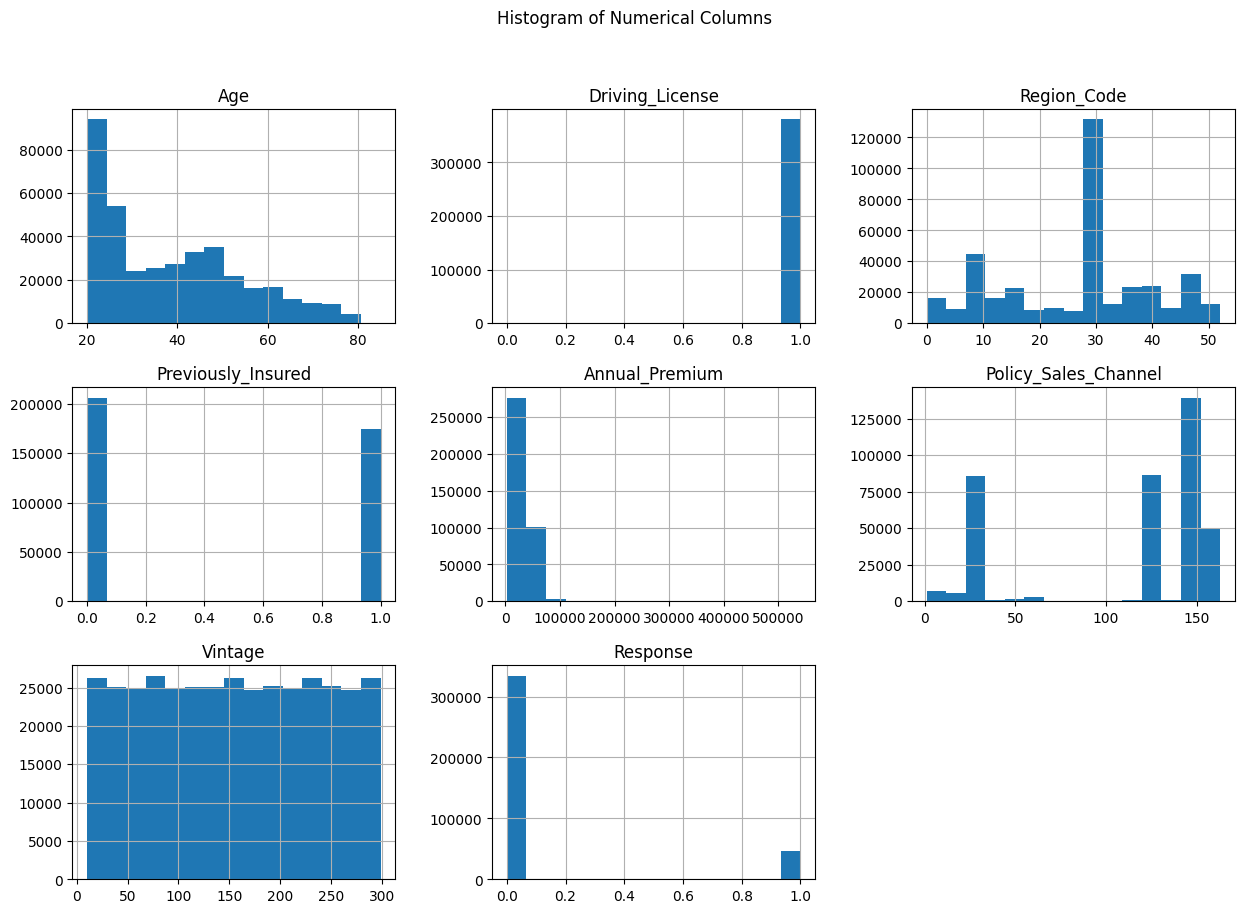

In [ ]:
# Plot histograms for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histogram of Numerical Columns")
plt.show()

#Plotting histogram for The column Response



In [ ]:
# Count occurrences of each class
data['Response'].value_counts()

,count
Response,
0,334399
1,46710


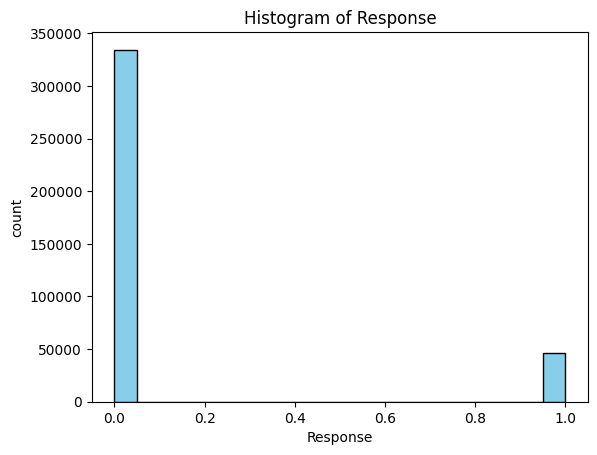

In [ ]:
plt.hist(data['Response'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Response")
plt.xlabel("Response")
plt.ylabel("count")
plt.show()

Since the count of zero here is more therefore the data is highly imbalance






#Countplot For gender

<ipython-input-24-bd558d46684f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Oranges')


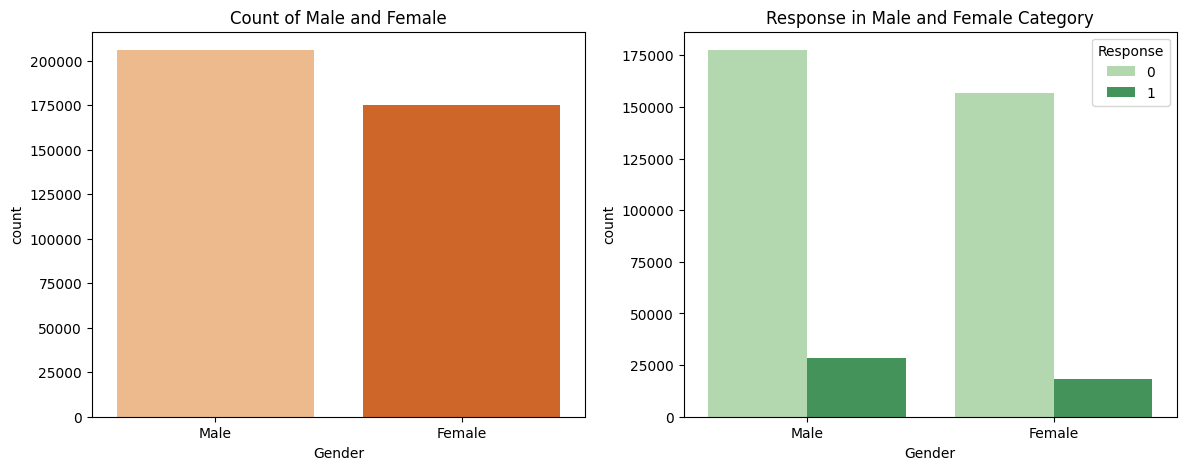

In [ ]:
# Set the overall figure size
plt.figure(figsize=(14, 5))

# Plot 1: Overall count of Male and Female
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data, palette='Oranges')
plt.title("Count of Male and Female")

# Plot 2: Response distribution by Gender
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Response', data=data, palette='Greens')
plt.title("Response in Male and Female Category")

plt.show()



*   The dataset is almost equally distributed for the variable gender
*   The male category in the gender variable is slightly higher than that of females and therefore chances of buying the insurance is also slightly high in males case



#Plot for Age Vs Response

<Axes: xlabel='Age', ylabel='count'>

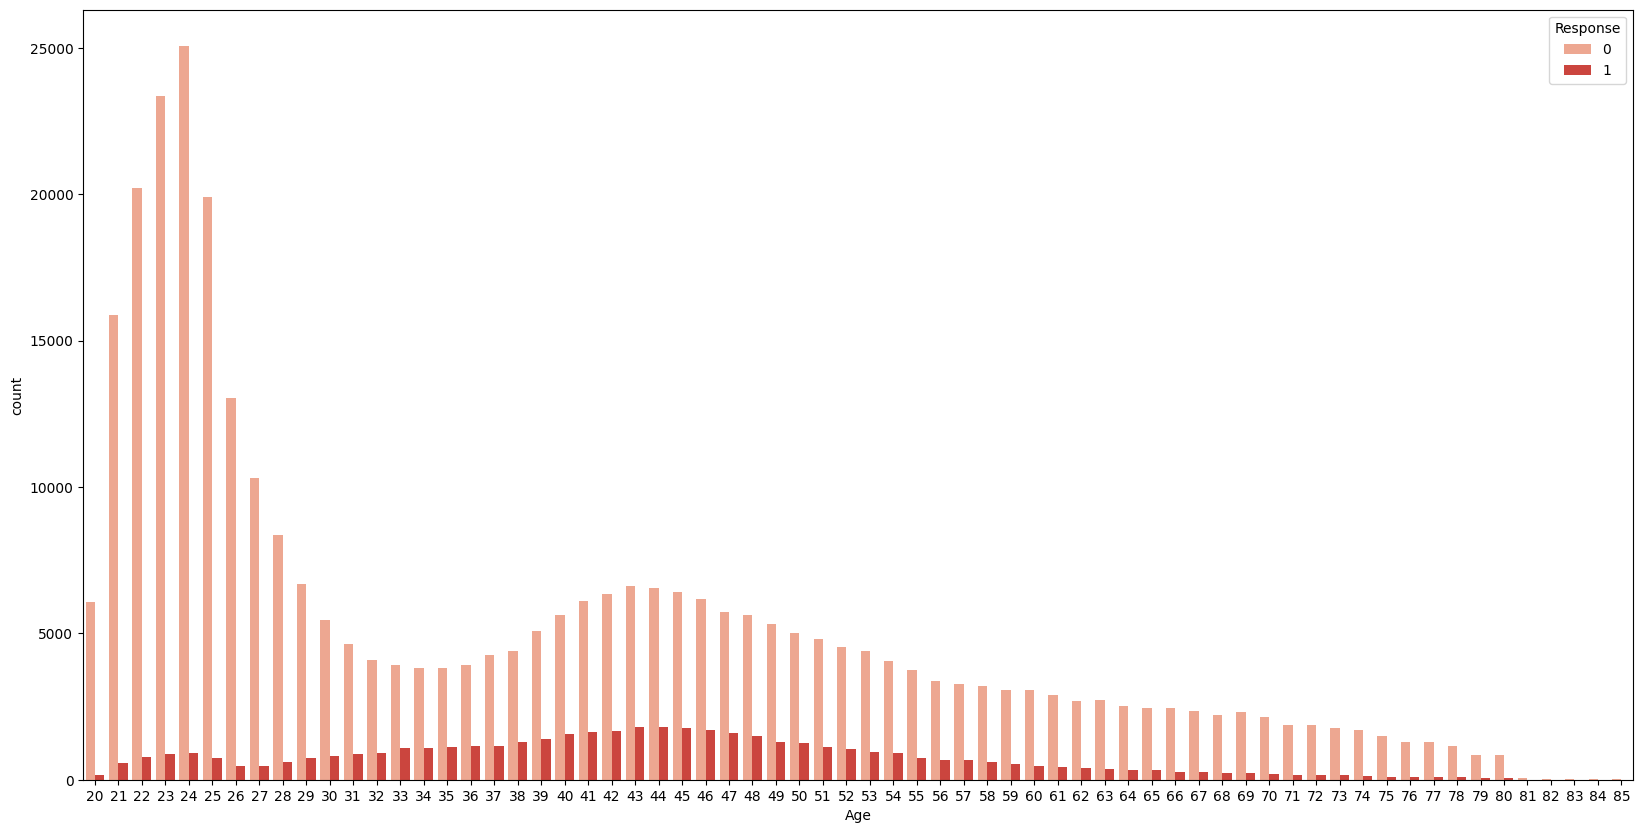

In [ ]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data,palette='Reds')

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.


*   people after 60 are also seems not intrested




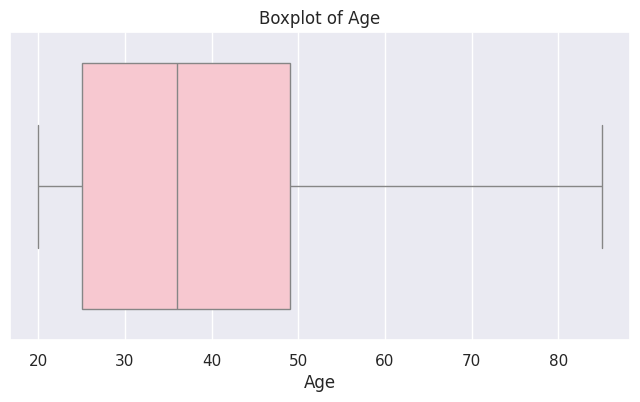

In [ ]:
# ploting a boxplot for Age
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 4))      # 8 is width and 4 is length
sns.boxplot(x='Age', data=data, color='pink')  # specify 'x' to position Age on the x-axis
plt.xlabel("Age")
plt.title("Boxplot of Age")
plt.show()

From the boxplot we can say that there are no outlier in the data

# Driving licence Vs Response


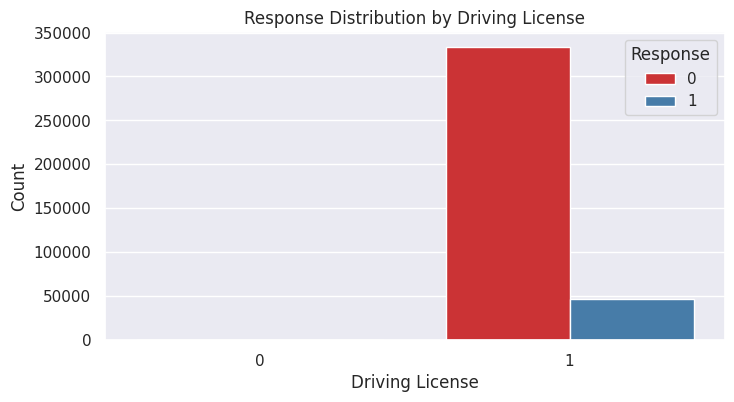

In [ ]:

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a count plot for Driving_License with hue as Response
sns.countplot(x='Driving_License', hue='Response', data=data, palette='Set1')

# Adding labels and title
plt.xlabel("Driving License")
plt.ylabel("Count")
plt.title("Response Distribution by Driving License")

plt.show()



*   peoples who are interested in Vehicle Insurance almost all have driving license.




# Previously_Insured Vs Response

<Axes: xlabel='Previously_Insured', ylabel='count'>

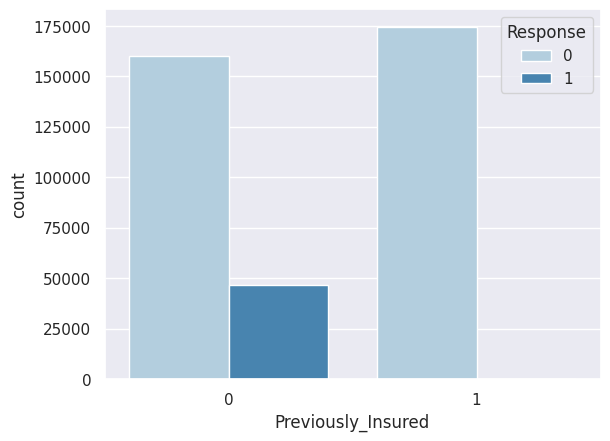

In [ ]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='Blues')



*   customers those who has not previously insured will likely to be more intrested for the insurence




## Vehicle_Age Vs Response

<Axes: xlabel='Vehicle_Age', ylabel='count'>

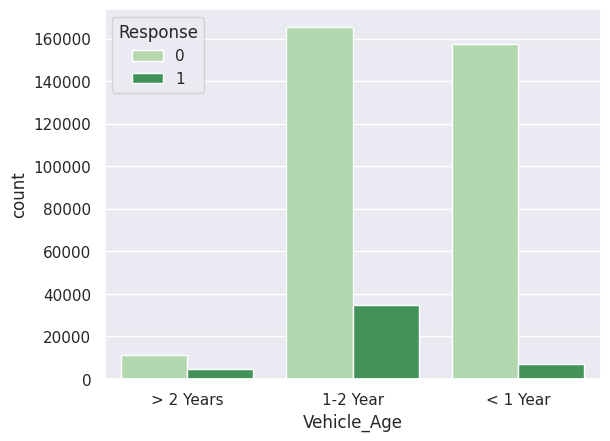

In [ ]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='Greens')

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

* Customers with with Vehicle_Age < 1 years have very less chance of buying Insurance

<ipython-input-30-5f678d74ab10>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual_Premium'], color='purple')


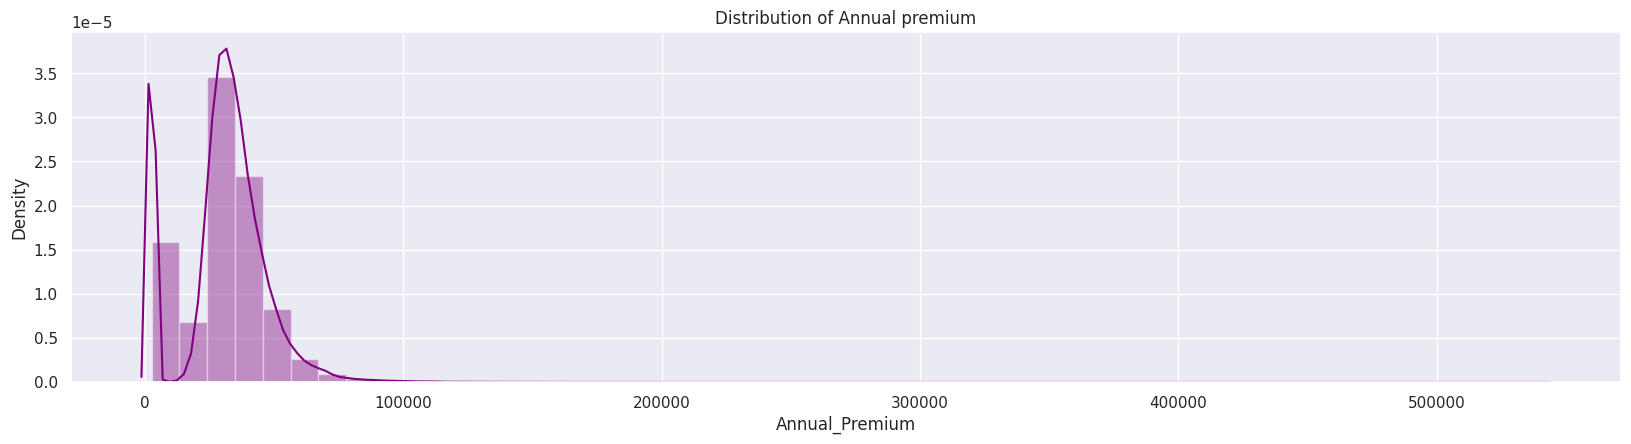

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='purple')
plt.title("Distribution of Annual premium")
plt.show()


* From the distribution plot we can infer that the annual premimum variable is right skewed

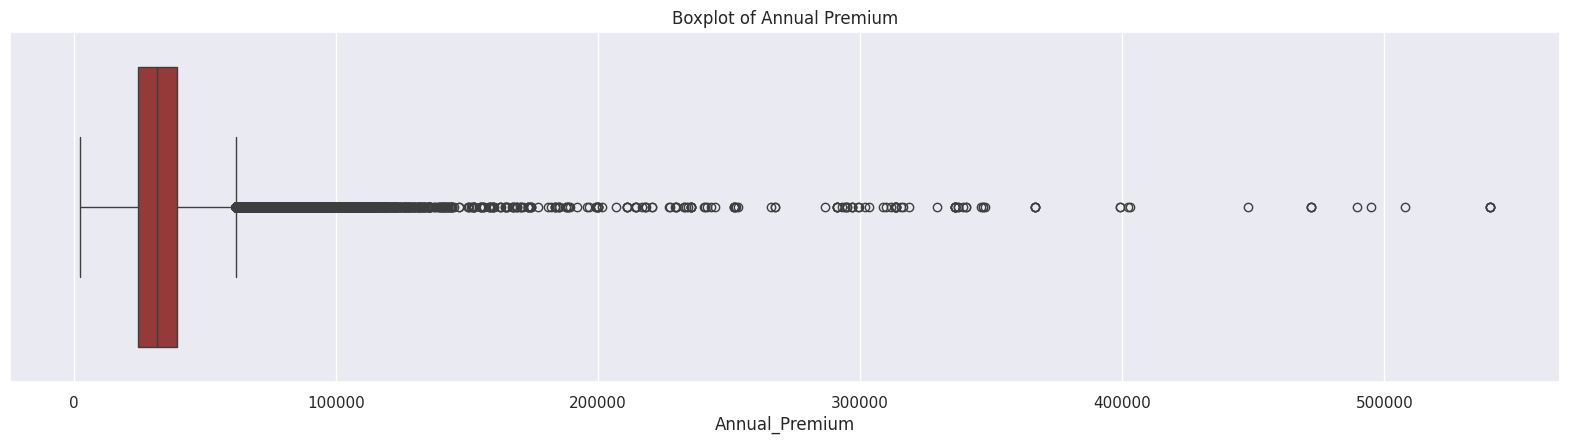

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 2)
# Using orient='h' for horizontal boxplot
sns.boxplot(x=data['Annual_Premium'], orient='h', color='brown')
plt.title("Boxplot of Annual Premium")
plt.show()

* From the boxplot we can clearly see there are lot of outliers present in the variable

# correlation Matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.05, 'Pearson correlation of Features')

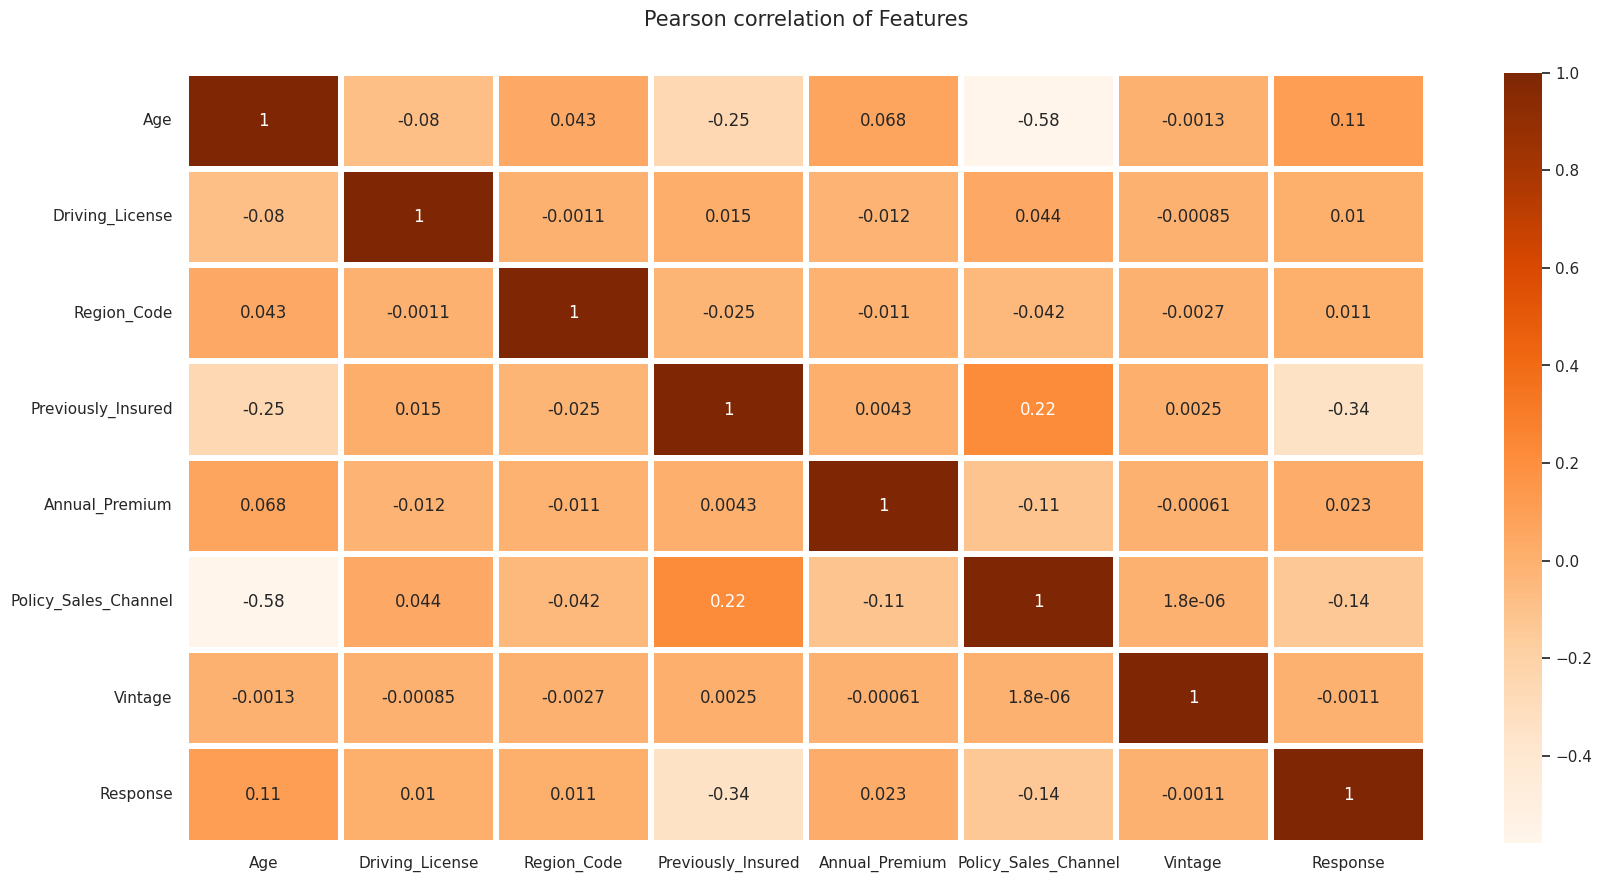

In [ ]:
correlation_matrix = data[numerical_columns].corr()

f, ax = plt.subplots(figsize=(20,10))

sns.heatmap(correlation_matrix, ax=ax, annot=True,linewidths=3,cmap='Oranges')

plt.title("Pearson correlation of Features", y=1.05, size=15)

#Data Preprocessing

label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#changing categorical value to numerical values
labelEncoder = LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [ ]:
data.dtypes

,0
Gender,int64
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,int64
Vehicle_Damage,int64
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64




*   So when we check the datatypes after label Encoding it will give us integer




#### Seperating the dependent and independent variable

In [ ]:
x=data.drop(['Response'],axis=1) #for independent variable
y=data['Response']     # for dependent

##Training the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

#### Feature Selection

[0.00462724 0.15026517 0.0004802  0.11140466 0.057344   0.01664256
 0.07424901 0.24100892 0.07236029 0.27161794]


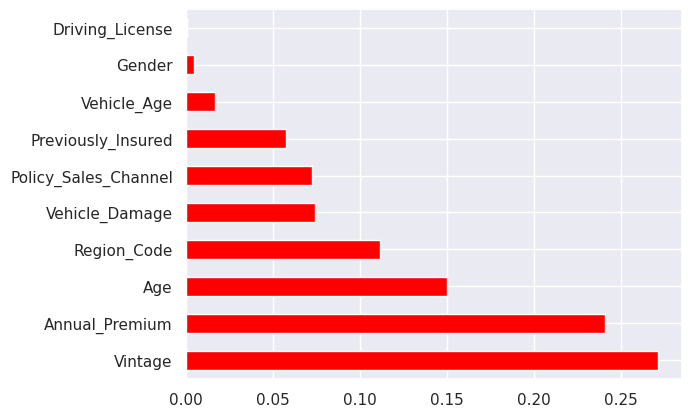

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh', color='red')
plt.show()



*   Now less important features can be removed from the dataset




###Feature Extraction

In [ ]:
x=x.drop(['Driving_License','Gender'],axis=1)

## Handeling imbalance dataSet



*   From the above plot we can see there is a huge difference between the datasets, which means the dataset is highly imbalance. So now we will handle the imbalance data.




In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

Original dataset shape: Counter({0: 334399, 1: 46710})
Resampled dataset shape: Counter({1: 334399, 0: 334399})


<ipython-input-44-917b72268dcc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_new, palette='Purples')


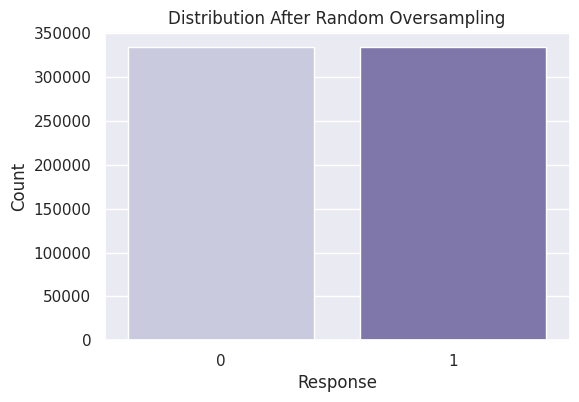

In [ ]:
# Initialize RandomOverSampler
random_sample = RandomOverSampler()

# Apply random oversampling
x_new, y_new = random_sample.fit_resample(x, y)

# Display the class distribution before and after resampling
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_new))

# Plot the distribution of the resampled target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_new, palette='Purples')
plt.title("Distribution After Random Oversampling")

plt.ylabel("Count")
plt.show()

### After balancing the data we will train the data again

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(468158, 8) (200640, 8) (468158,) (200640,)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Model Selection



*   Problem can be identified by Binary classifiction like weather the customer will take the vehicle insurance or not.(Logistic regression)
* Dataset has more than 300k records

* cannot go with SVM Classifier as it takes more time to train as dataset increase



###  1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,classification_report

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict the target values for the test set
pred = model.predict(x_test)

# Predict the probability of the positive class for the test set
# This is useful for calculating AUC, especially for binary classification
lr_probability = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

In [ ]:
# Calculate evaluation metrics
# Accuracy: Measures the percentage of correct predictions
acc_lr = accuracy_score(y_test, pred)

# Recall: Measures the model's ability to identify positive instances
recall_lr = recall_score(y_test, pred)

# Precision: Measures the accuracy of positive predictions
precision_lr = precision_score(y_test, pred)

# F1 Score: The harmonic mean of precision and recall, useful for imbalanced datasets
f1score_lr = f1_score(y_test, pred)

# ROC AUC Score: Measures how well the model distinguishes between positive and negative classes
AUC_LR = roc_auc_score(y_test, lr_probability)

# Print the results
print("Accuracy:", acc_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("F1 Score:", f1score_lr)
print("ROC AUC Score:", AUC_LR)


Accuracy: 0.7835825358851675
Recall: 0.9771911635696626
Precision: 0.7044079391770506
F1 Score: 0.818674573015409
ROC AUC Score: 0.8217060687487825


In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61482
           1       0.98      0.70      0.82    139158

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



### ROC Curve

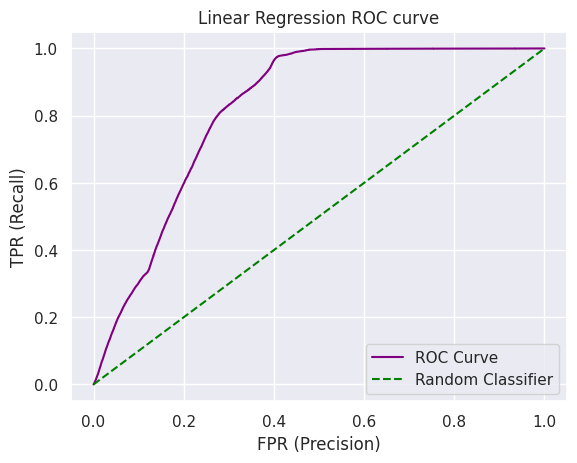

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr) for different thresholds
fpr, tpr, _ = roc_curve(y_test, lr_probability)

# Plotting the ROC curve
plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

# Plot the ROC curve by plotting fpr against tpr
plt.plot(fpr,tpr,label='ROC Curve',color='purple')

# This line has a slope of 1, indicating random guessing
plt.plot((0,1), linestyle='dashed',color='Green', label='Random Classifier')

# Add legend to differentiate between the ROC curve and the random classifier line
plt.legend()

plt.show()

[[59194 41134]
 [ 2288 98024]]


<Axes: >

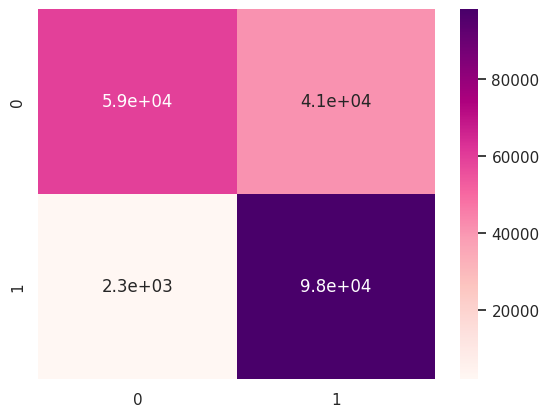

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

## 2.RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = randomforest.predict(x_test)

# Predict the probability of the positive class for ROC AUC calculation
RF_probability = randomforest.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
# AUC score: calculated using probabilities, which is essential for measuring model's discriminatory power
AUC_RF = roc_auc_score(y_test, RF_probability)

# Accuracy: measures overall correctness
acc_rf = accuracy_score(y_test, y_pred)

# Recall: sensitivity or true positive rate
recall_rf = recall_score(y_test, y_pred)

# Precision: positive predictive value
precision_rf = precision_score(y_test, y_pred)

# F1 Score: harmonic mean of precision and recall, especially useful for imbalanced data
f1score_rf = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", acc_rf)
print("ROC AUC Score:", AUC_RF)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1 Score:", f1score_rf)


Accuracy: 0.9387659489633173
ROC AUC Score: 0.9978015719374338
Recall: 0.9967002950793524
Precision: 0.8931978987993139
F1 Score: 0.9421148844747653


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     88764
           1       1.00      0.89      0.94    111876

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



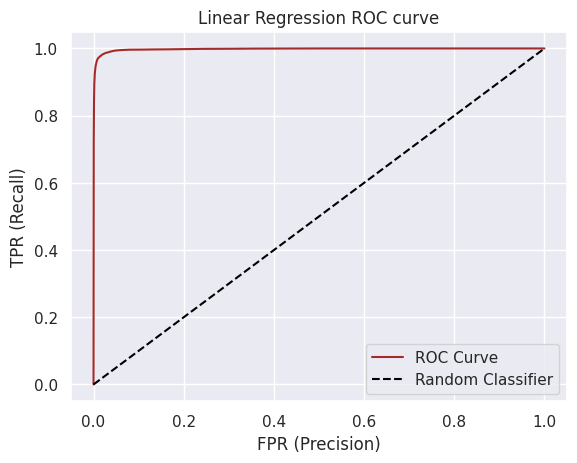

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr, label='ROC Curve',color='brown')

plt.plot((0,1), linestyle='dashed',color='black',label='Random Classifier')

plt.legend()
plt.show()

[[88445   319]
 [11883 99993]]


<Axes: >

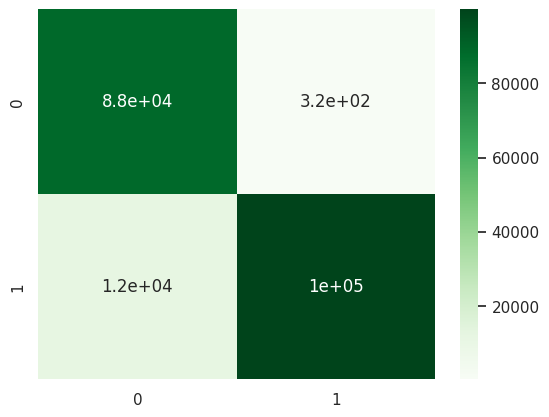

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='Greens')

## 3. XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Initialize and train the XGBoost Classifier
xgb = XGBClassifier()
XGB_fit = xgb.fit(x_train, y_train)

# Predict the target values for the test set
y_predict = XGB_fit.predict(x_test)

# Predict the probability of the positive class for ROC AUC calculation
XGB_probability = XGB_fit.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
# Accuracy: measures overall correctness
acc_xgb = accuracy_score(y_test, y_predict)

# Recall: sensitivity or true positive rate
recall_xgb = recall_score(y_test, y_predict)

# Precision: positive predictive value
precision_xgb = precision_score(y_test, y_predict)

# F1 Score: harmonic mean of precision and recall
f1score_xgb = f1_score(y_test, y_predict)

# AUC score: calculated using probabilities, essential for measuring model's discriminatory power
AUC_xgb = roc_auc_score(y_test, XGB_probability)

# Print the metrics
print("Accuracy:", acc_xgb)
print("ROC AUC Score:", AUC_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1 Score:", f1score_xgb)

Accuracy: 0.8120564194577352
ROC AUC Score: 0.8688425195878294
Recall: 0.9353217959964909
Precision: 0.7503218841217162
F1 Score: 0.8326699414706443


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79     75595
           1       0.94      0.75      0.83    125045

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.81    200640
weighted avg       0.84      0.81      0.81    200640



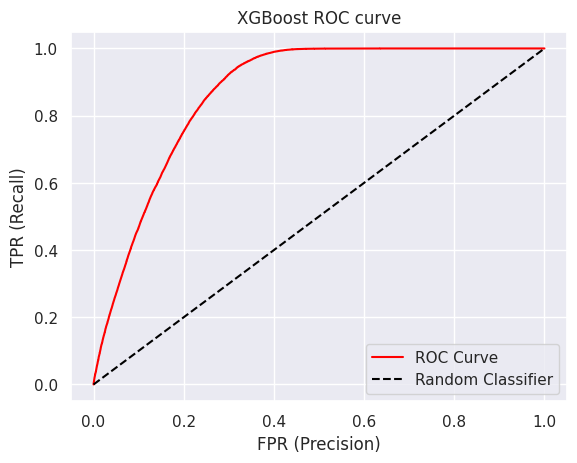

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr,color='red',label='ROC Curve')

plt.plot((0,1), linestyle='dashed',color='black',label='Random Classifier')

plt.legend()
plt.show()

[[69107 31221]
 [ 6488 93824]]


<Axes: >

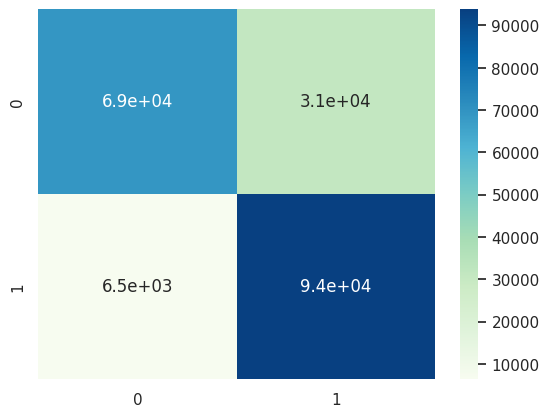

In [ ]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## Compairing the model

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783583,0.977191,0.704408,0.818675,0.821706
Randomforest,0.939185,0.996820,0.893784,0.942494,0.945095
XGBClassifier,0.812056,0.935322,0.750322,0.832670,0.868843




*   Based on the metrics, Random Forest is the best model out of the three for this dataset, as it provides the highest overall performance across accuracy, recall, precision, F1 score, and ROC AUC.




##Conclusion

* Customers of age between 30 to 60 are more likely to buy insurance.
* Customers with Driving License have higher chance of buying Insurance.
* Customers with Vehicle_Damage are likely to buy insurance.
*  The variable such as Age, Previously_insured,Annual_premium  are more afecting the target variable.
* comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.